In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [36]:
df = pd.read_csv('data//hw3.csv')

In [37]:
df['ts'] = pd.to_datetime(df['ts'])
df.set_index('ts', inplace=True)

In [38]:
df.head()

,open,high,low,close,volume,volumeUSD,token,chain
ts,,,,,,,,
2021-12-02 14:00:00,22.4150,22.4913,22.0816,22.3516,31502.151631,NaN,UNI,ETH
2021-12-02 23:00:00,4.8043,4.8043,4.7426,4.7806,73686.230000,NaN,CRV,ETH
2021-12-10 15:00:00,182.4900,NaN,175.2100,175.8600,73736.747000,NaN,SOL,SOL
2021-12-10 18:00:00,3978.4300,3989.7400,3932.0000,3972.3400,18508.040102,NaN,ETH,ETH
2021-12-08 21:00:00,193.3240,194.2420,192.5640,193.1540,69426.909000,NaN,SOL,SOL


Check the time series.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2667 entries, 2021-12-02 14:00:00 to 2021-12-06 07:00:00
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       2667 non-null   float64
 1   high       2163 non-null   float64
 2   low        2378 non-null   float64
 3   close      2531 non-null   float64
 4   volume     2667 non-null   float64
 5   volumeUSD  0 non-null      float64
 6   token      2667 non-null   object 
 7   chain      2667 non-null   object 
dtypes: float64(6), object(2)
memory usage: 187.5+ KB


2360 entries in total. High, low and close has missing values.

In [40]:
df['token'].value_counts()

BTC                                   323
COMP                                  322
CRV                                   318
SOL                                   318
USDT                                  314
UNI                                   312
AAVE                                  312
ETH                                   298
<span name="tokenName">UNI</span>      30
<span name="tokenName">ETH</span>      28
<span name="tokenName">USDT</span>     19
<span name="tokenName">CRV</span>      17
<span name="tokenName">SOL</span>      16
<span name="tokenName">AAVE</span>     16
<span name="tokenName">BTC</span>      14
<span name="tokenName">COMP</span>     10
Name: token, dtype: int64

In [41]:
df['chain'].value_counts()

ETH     1663
BTC      337
SOL      334
USDT     333
Name: chain, dtype: int64

There are badly formatted token names.

In [42]:
df.duplicated().sum()

307

307 rows are duplicated.

In [43]:
tokens_in_df = df['token'].unique()

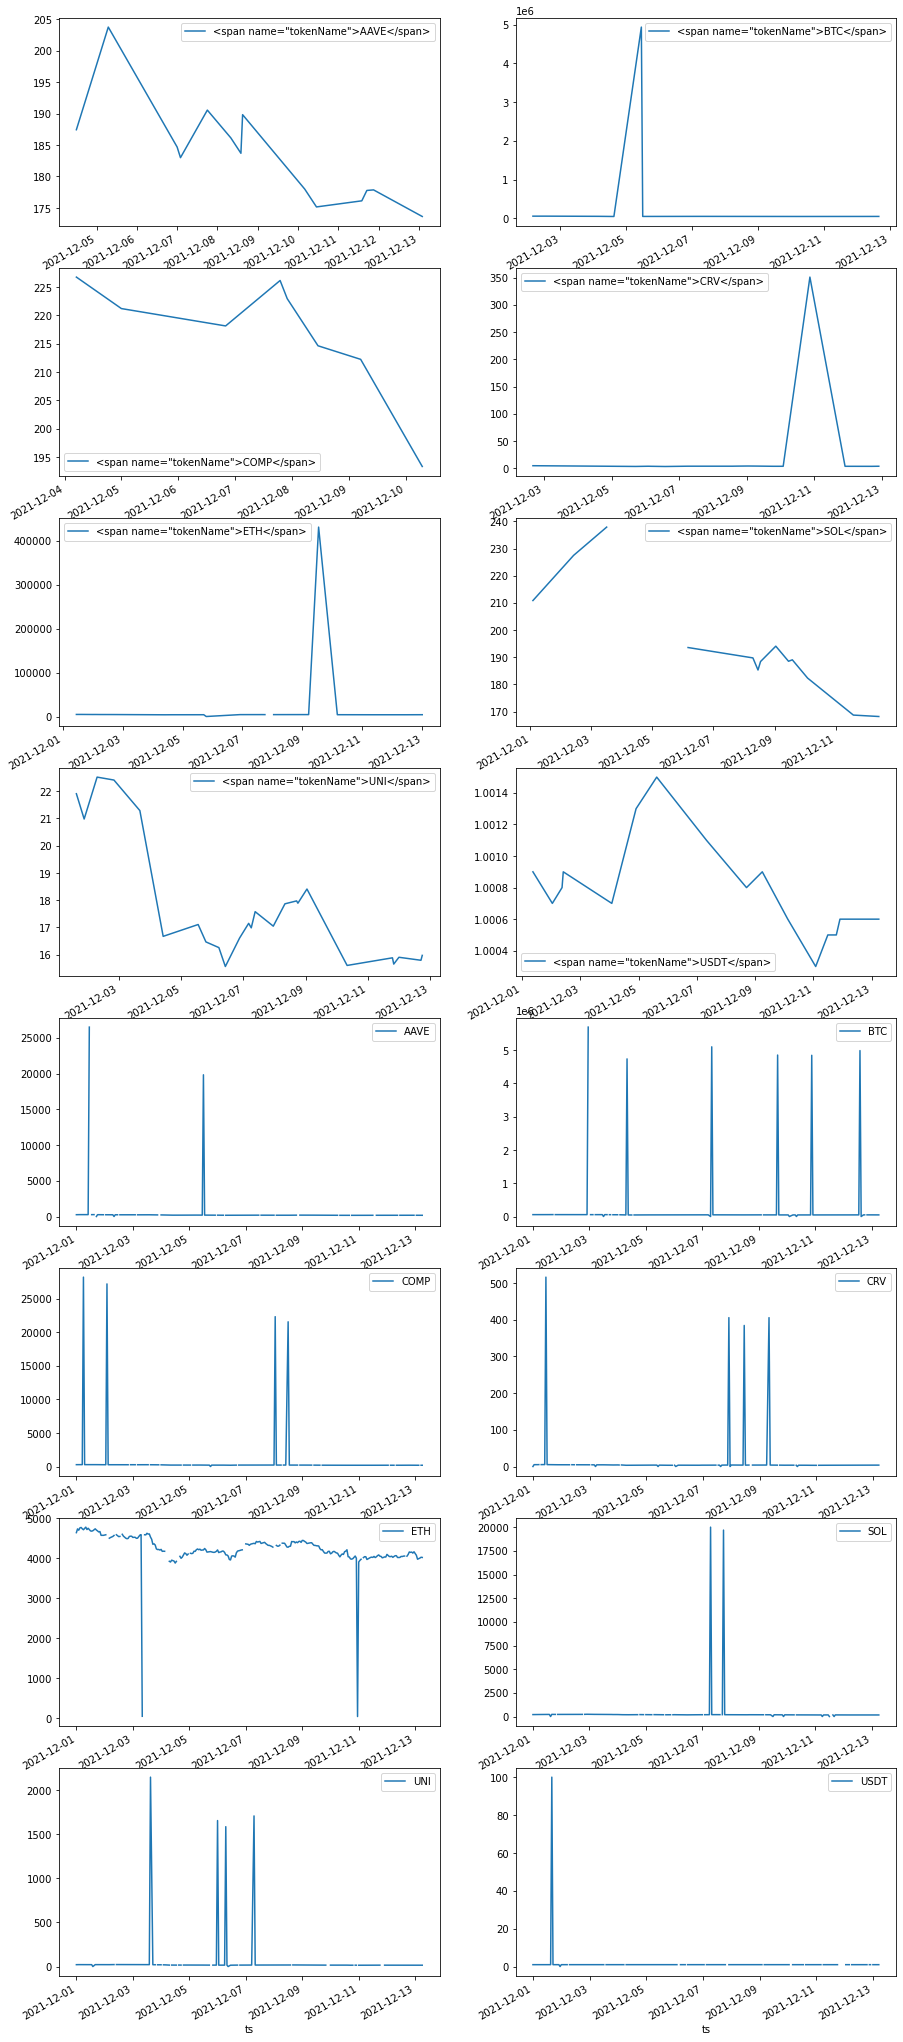

In [44]:
fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

Missing values and outliers in close can be seen from this plot.

1. drop the duplicates.

In [45]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2360 entries, 2021-12-02 14:00:00 to 2021-12-06 07:00:00
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       2360 non-null   float64
 1   high       1910 non-null   float64
 2   low        2104 non-null   float64
 3   close      2244 non-null   float64
 4   volume     2360 non-null   float64
 5   volumeUSD  0 non-null      float64
 6   token      2360 non-null   object 
 7   chain      2360 non-null   object 
dtypes: float64(6), object(2)
memory usage: 165.9+ KB


2. format the token names.

In [47]:
df['token'] = df['token'].str.strip().str.replace('<span name="tokenName">', '').str.replace('</span>', '')

In [48]:
df['token'].value_counts()

UNI     295
CRV     295
SOL     295
ETH     295
AAVE    295
USDT    295
COMP    295
BTC     295
Name: token, dtype: int64

Sort the time series in chronological order.

In [49]:
df.sort_values(by=['token', 'ts'], ascending=True, inplace=True)
df

,open,high,low,close,volume,volumeUSD,token,chain
ts,,,,,,,,
2021-12-01 00:00:00,257.1020,260.7750,255.3450,257.0780,2730.299,NaN,AAVE,ETH
2021-12-01 01:00:00,257.1490,266.2490,255.2700,264.8160,5752.541,NaN,AAVE,ETH
2021-12-01 02:00:00,264.7550,266.1870,262.5970,263.1250,1559.330,NaN,AAVE,ETH
2021-12-01 03:00:00,263.1840,NaN,NaN,266.2570,1647.398,NaN,AAVE,ETH
2021-12-01 04:00:00,266.3840,267.0240,264.2840,265.5020,829.993,NaN,AAVE,ETH
...,...,...,...,...,...,...,...,...
2021-12-13 02:00:00,1.0005,NaN,1.0004,1.0004,7133859.470,NaN,USDT,USDT
2021-12-13 03:00:00,1.0004,1.0006,1.0004,1.0006,4337884.530,NaN,USDT,USDT
2021-12-13 04:00:00,1.0006,1.0006,1.0004,1.0006,2928892.910,NaN,USDT,USDT


3. Use the heuristic for missing close prices as verage of high + low of the day

In [50]:
df.loc[df['close'].isnull(), 'close'] = 0.5 * (df.loc[df['close'].isnull(), 'high'] + df.loc[df['close'].isnull(), 'low'])

In [51]:
tokens_in_df = df['token'].unique()

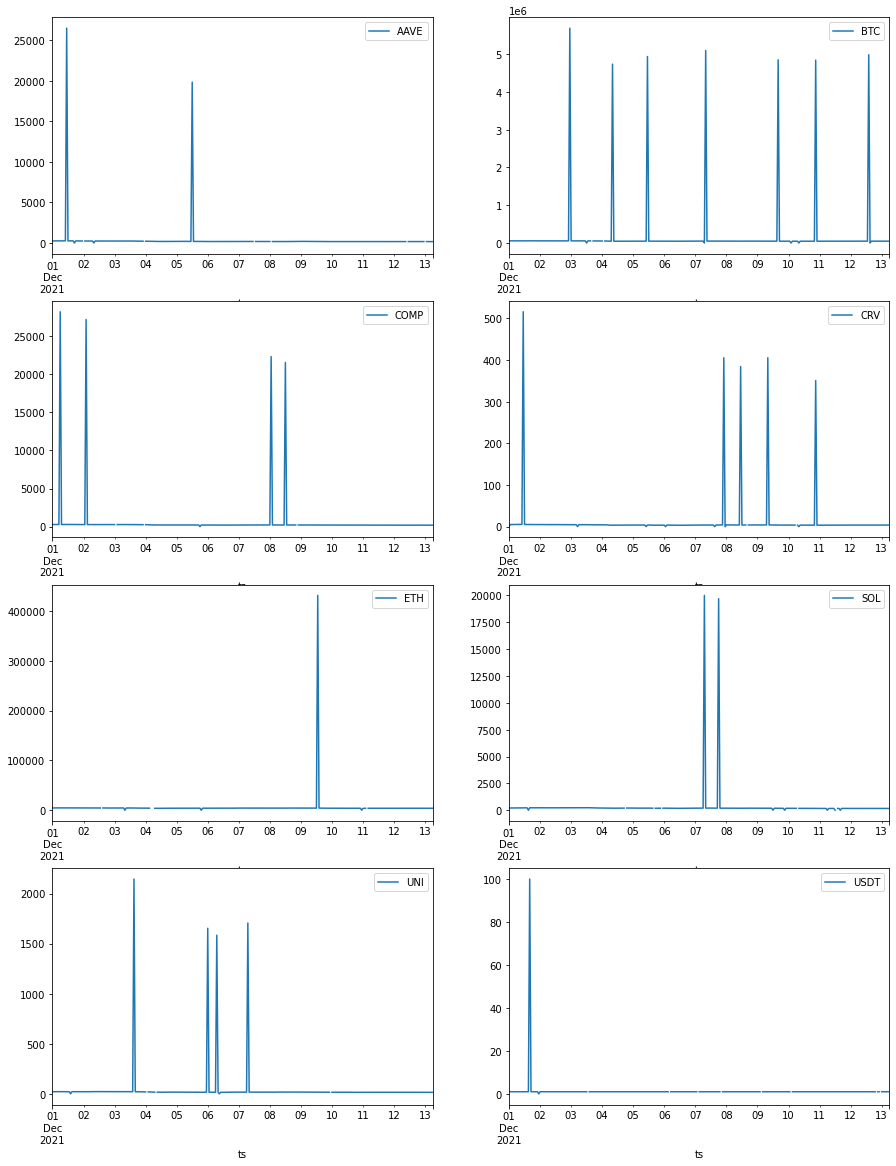

In [52]:
fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

In [53]:
df['close'].isnull().sum()

33

There are still missing values in close, take a close look at them.

In [54]:
df.loc[df['close'].isnull()]

,open,high,low,close,volume,volumeUSD,token,chain
ts,,,,,,,,
2021-12-02 00:00:00,251.1620,NaN,250.0750,NaN,8.301560e+02,NaN,AAVE,ETH
2021-12-03 23:00:00,226.3090,NaN,224.5400,NaN,1.362667e+03,NaN,AAVE,ETH
2021-12-07 12:00:00,192.4750,193.7560,NaN,NaN,1.097151e+03,NaN,AAVE,ETH
2021-12-08 01:00:00,187.0420,NaN,184.7410,NaN,2.044450e+03,NaN,AAVE,ETH
2021-12-12 10:00:00,177.5700,NaN,176.6700,NaN,2.885610e+02,NaN,AAVE,ETH
2021-12-13 00:00:00,180.5100,181.1900,NaN,NaN,1.016050e+03,NaN,AAVE,ETH
2021-12-03 16:00:00,56259.0400,NaN,55730.9300,NaN,1.394131e+03,NaN,BTC,BTC
2021-12-04 01:00:00,53633.0200,NaN,53027.0100,NaN,8.411414e+02,NaN,BTC,BTC
2021-12-03 01:00:00,270.1900,271.8700,NaN,NaN,1.999890e+02,NaN,COMP,ETH


Theses missing close values are caused by missing low or high.
<br> Try to tackle it with ffill method.

In [77]:
df1 = df.copy()

In [78]:
df1

,open,high,low,close,volume,volumeUSD,token,chain
ts,,,,,,,,
2021-12-01 00:00:00,257.1020,260.7750,255.3450,257.0780,2730.299,NaN,AAVE,ETH
2021-12-01 01:00:00,257.1490,266.2490,255.2700,264.8160,5752.541,NaN,AAVE,ETH
2021-12-01 02:00:00,264.7550,266.1870,262.5970,263.1250,1559.330,NaN,AAVE,ETH
2021-12-01 03:00:00,263.1840,NaN,NaN,266.2570,1647.398,NaN,AAVE,ETH
2021-12-01 04:00:00,266.3840,267.0240,264.2840,265.5020,829.993,NaN,AAVE,ETH
...,...,...,...,...,...,...,...,...
2021-12-13 02:00:00,1.0005,NaN,1.0004,1.0004,7133859.470,NaN,USDT,USDT
2021-12-13 03:00:00,1.0004,1.0006,1.0004,1.0006,4337884.530,NaN,USDT,USDT
2021-12-13 04:00:00,1.0006,1.0006,1.0004,1.0006,2928892.910,NaN,USDT,USDT


In [79]:
df1[['low', 'high']] = df1.groupby('token')[['low', 'high']].fillna(method='ffill')

In [80]:
df1[['high', 'low']].isnull().sum()

high    1
low     0
dtype: int64

There is still one missing high value, and it must come from the row that has the smallest time.
<br> Try to fill it with the nearest neighbor.

In [81]:
df1['high'] = df1.groupby('token')['high'].fillna(method='bfill')

In [82]:
df1['high'].isnull().sum()

0

Use the heuristic for missing close prices as verage of high + low of the day

In [83]:
df1.loc[df1['close'].isnull(), 'close'] = 0.5 * (df1.loc[df1['close'].isnull(), 'high'] + df1.loc[df1['close'].isnull(), 'low'])

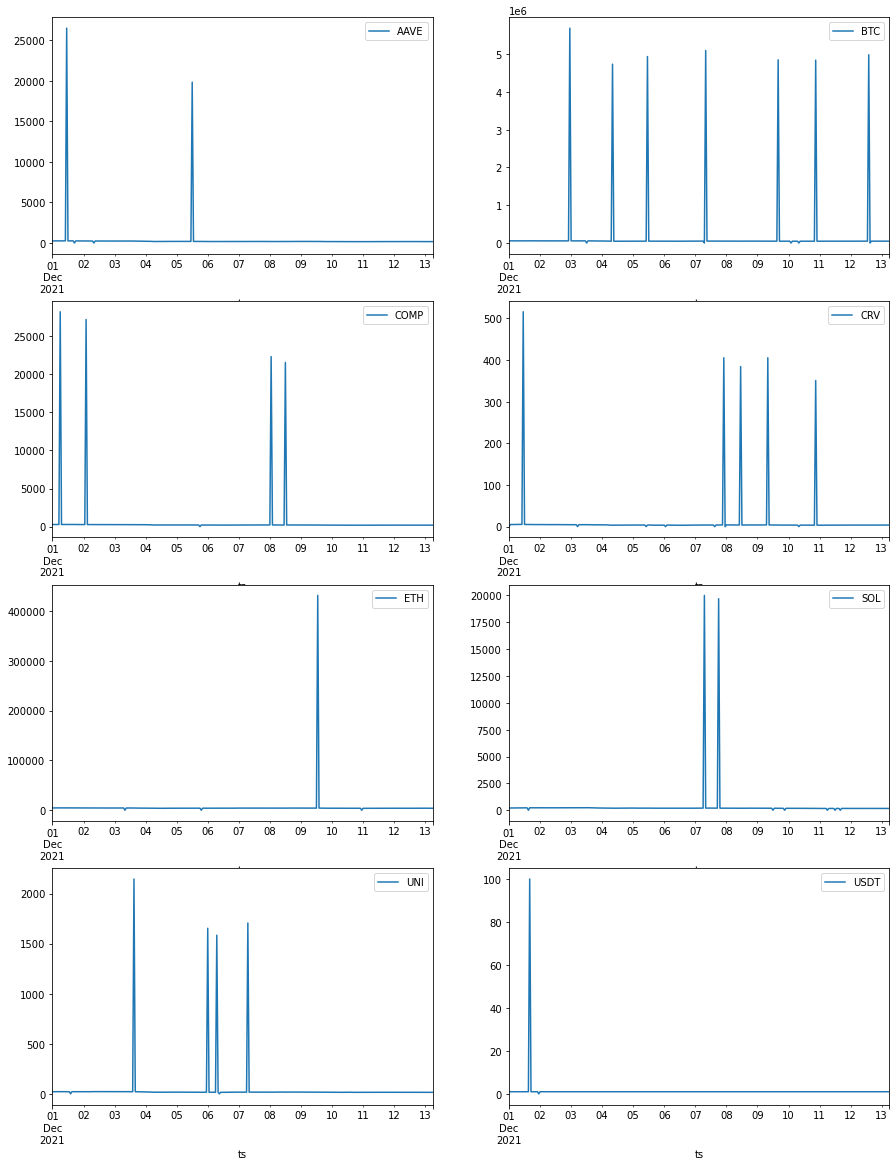

In [84]:
tokens_in_df1 = df1['token'].unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df1.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df1.size / 2)))

idx = 0
for label, df_token1 in df1[['token', 'close']].groupby('token'):
    df_token1['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

So we now have good names, no duplicates and no missing values as we can see from the chart, however we still have these massive outliers. 

Let's come up with a heuristic to define an outlier, as something where the close price is greater than 2x higher or lower than the open price (given this is hourly data, we shouldn't expect it to change that much)

In [85]:
df1.loc[df1['close'] / df1['open'] >= 2, 'close'] = 0.5 * (df1.loc[df1['close'] / df1['open'] >= 2, 'high'] + df1.loc[df1['close'] / df1['open'] >= 2, 'low'])

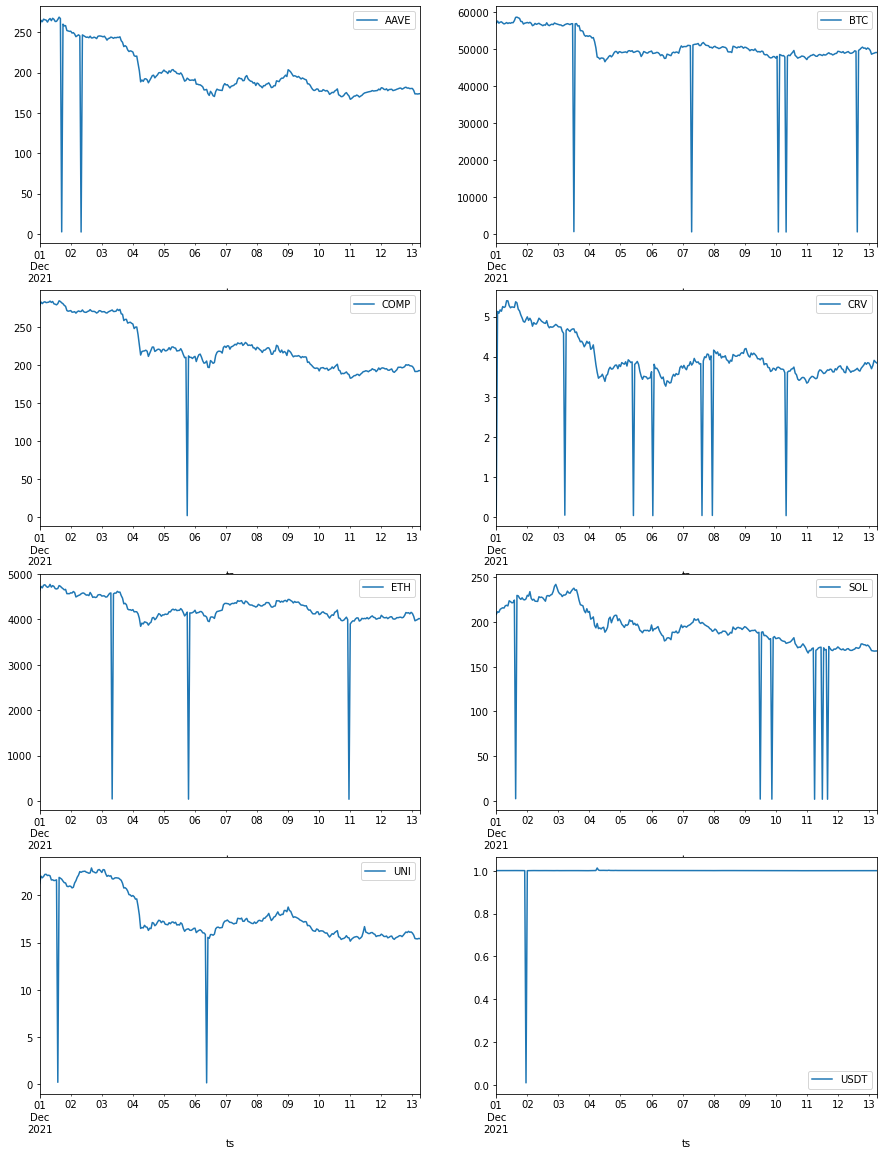

In [86]:
tokens_in_df1 = df1['token'].unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df1.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df1.size / 2)))

idx = 0
for label, df_token1 in df1[['token', 'close']].groupby('token'):
    df_token1['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

The plots seems better because we can see the variation of the non-extreme values. But there are still some outliers. We can see drastic plummet at these data points.
<br> Maybe we can replace these values with the previous value.

In [94]:
df1.loc[((df1.groupby('token')['close'].shift(0) - df1.groupby('token')['close'].shift(1)) / df1.groupby('token')['close'].shift(1)) < -0.75, 'close'] = np.nan

In [96]:
df1['close'] = df1.groupby('token')['close'].fillna(method='ffill')

In [97]:
df1['close'].isnull().sum()

0

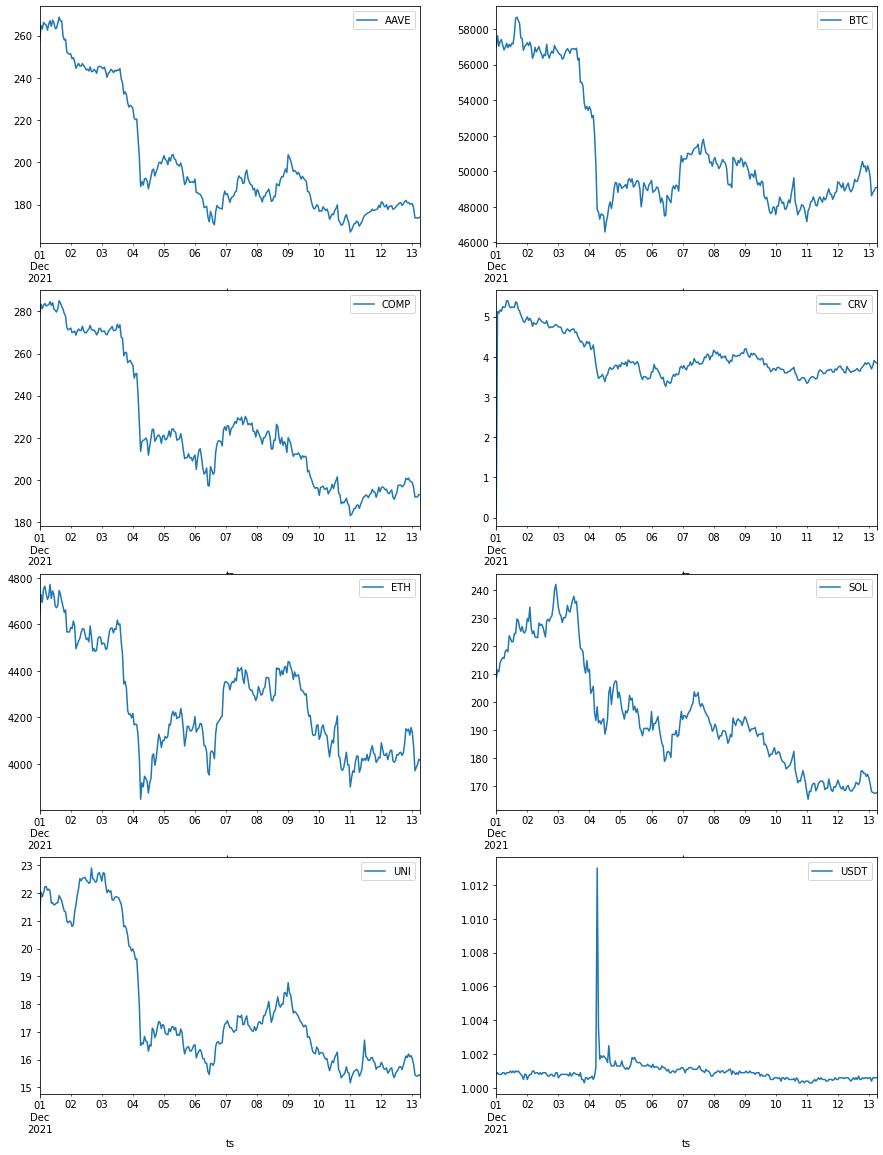

In [98]:
tokens_in_df1 = df1['token'].unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df1.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df1.size / 2)))

idx = 0
for label, df_token1 in df1[['token', 'close']].groupby('token'):
    df_token1['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

We have tackled the outliers, and now calculate the volumeUSD.

In [101]:
df1['volumeUSD'] = df1['volume'] * df1['close']
df1.head()

,open,high,low,close,volume,volumeUSD,token,chain
ts,,,,,,,,
2021-12-01 00:00:00,257.102,260.775,255.345,257.078,2730.299,7.018998e+05,AAVE,ETH
2021-12-01 01:00:00,257.149,266.249,255.270,264.816,5752.541,1.523365e+06,AAVE,ETH
2021-12-01 02:00:00,264.755,266.187,262.597,263.125,1559.330,4.102987e+05,AAVE,ETH
2021-12-01 03:00:00,263.184,266.187,262.597,266.257,1647.398,4.386312e+05,AAVE,ETH
2021-12-01 04:00:00,266.384,267.024,264.284,265.502,829.993,2.203648e+05,AAVE,ETH


In [103]:
df1.groupby('chain').agg({'volumeUSD': np.sum})

,volumeUSD
chain,
BTC,1.095917e+10
ETH,1.365106e+10
SOL,4.076445e+09
USDT,1.008247e+09
